# Python Equivalent Code for Chapter 2 of ISLR

Here I try to map the commands specified in R to 
the python equivalent. All commands are as mentioned
in ISLR chapter 2.

In [1]:
# Basic Commands
# creating a vector (python equivalent is list)
x=[1,2,3,4]   
y = [1,4,3,7]
type(x)

list

In [2]:
# Finding the length
# R command : length (x)
len(x)

4

In [3]:
# adding two lists
# R command: x+y
# In python plain x+y will concatenate the two lists. 
# So numpy arrays make it easier. 

import numpy as np
np.array(x) + np.array(y)

array([ 2,  6,  6, 11])

In [5]:
# Creating a matrix
# R command : x=matrix (data=c(1,2,3,4) , nrow=2, ncol =2)
# R reads this data column wise so we need to specify the order explicitly
x_2 = np.array([1,2,3,4]).reshape((2,2),order="F") 
print(x_2)

[[1 3]
 [2 4]]


In [6]:
# matrix (c(1,2,3,4) ,2,2,byrow =TRUE)
np.array([1,2,3,4]).reshape((2,2)) 

array([[1, 2],
       [3, 4]])

In [7]:
# R  command : sqrt(x)
# R command : x^2
np.sqrt(x)
np.sqrt(x_2)
np.square(x_2)

array([[ 1,  9],
       [ 4, 16]], dtype=int32)

In [8]:
# R command:  rnorm(50)
np.random.randn(50)

array([-0.25827447,  1.06218585, -1.09497862,  0.84604725, -0.09861192,
       -2.22038924, -0.27290557,  0.34115063, -1.1178686 , -0.26257729,
       -0.76987718, -2.33235329,  0.92735639,  0.74527308, -0.20165203,
        0.05101061,  0.49166043, -0.39073755,  0.64280314, -0.11251166,
       -0.36843931, -0.52712183, -0.58745556,  1.78057029,  0.09575703,
        2.59059413,  0.91236506,  2.46725447, -1.00329635, -1.43487068,
        0.65816094,  1.66367887,  0.04142814, -1.35169134, -0.07488342,
        0.39946233,  0.73228718, -1.69187921,  0.52406355, -1.26738265,
       -1.69894855,  0.35202011,  1.65845467, -1.32382478, -0.79673535,
        0.45899258,  2.10917165,  0.95584701, -0.03726276,  0.1682482 ])

In [9]:
# R command :  y= x + rnorm(50, mean = 50, sd= 0.1)
# cor(x,y)
x= np.random.randn(50)
y= x + (0.1*np.random.randn(50) + 50)
np.corrcoef(y,x)

array([[ 1.        ,  0.99416617],
       [ 0.99416617,  1.        ]])

### Graphics (will update soon)

In [4]:

# x= rnorm(100)
# y= rnorm(100)
# plot (x, y)
# plot(x,y,xlab=" this is the x-axis",ylab=" this is the y-axis",
#        main=" Plot of X vs Y")

import matplotlib.pyplot as plt

x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x,y)

### Indexing Data

In [11]:
# A=matrix (1:16 ,4 ,4)
# A[2,3]

A = np.array([list(range(1,17))]).reshape((4,4), order="F") # gotta give last number +1
A[1,2] # python indexing starts from 0


10

In [12]:
# A[c(1,3) ,c(2,4) ]
# A[-c(1,3),]
A[np.ix_([0,2],[1,3])]
A[np.ix_(range(3),range(1,4))]
np.delete(A, [0,2], axis=0)

array([[ 2,  6, 10, 14],
       [ 4,  8, 12, 16]])

### Loading Data

We use pandas to conveniently read csv files and load them as data frames

In [5]:
import pandas as pd

# R command: Auto=read.csv (" Auto.csv", header =T,na.strings ="?")
Auto = pd.read_csv("https://raw.githubusercontent.com/sujay-dsa/ISLR-solutions-python/master/Auto.csv")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
# R Command : dim(Auto)
Auto.shape

(397, 9)

Omit NA values.

In [10]:
# R command Auto=na.omit(Auto)
Auto = Auto.replace("?", np.NaN)
Auto.shape # no NA values

(397, 9)

In [11]:
# Check column names
# names (Auto)
Auto.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'], dtype=object)

In [12]:
# get summary of a Data Frame
# summary(Auto)
Auto.describe() # for only numeric values


,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
Auto.describe(include="all") # for all variables

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,392,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,93,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


columns like horsepower are numeric but seem to have some special characters.

In [21]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Horse power isn't numeric. Let's change it

In [22]:
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'])

In [23]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [24]:
Auto.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000,NaN


## Exercises

Justify the performance of flexible vs inflexible statistical method for


#### Large n, small p 
 Flexible method would perform better. Small number of predictors would imply lesser variance. The large number of samples would allow the method to fit better. 
#### Very Large p, extremely small n
Small n would result in overfitting by the flexible method. 
#### Relationship between response and predictors is highly non linear
Flexible method will be able to fit better. Would depend on the number of training samples but in general, flexible methods will take the shape of fit more better.
#### Error Variance is high
Flexible method might have a tendency to fit the errors. Will result in overfitting

 #### 2
 a) If we're interested in knowing the factors affecting the CEO's salary, it's an inference and regression problem
 b) If we're interested in knowing if a product will succeed or fail, it's a classification and prediction problem
 c) If we're interested in knowing the % change in USD w.r.t. stock markets, it's a prediction and regression problem.

#### 6

A parametric approach assumes the shape of the response with respect to the inputs. This can be problematic when the shape of the response is too squiggly.

## Applied
#### 8

In [84]:
# Read the college dataset

college = pd.read_csv("https://raw.githubusercontent.com/sujay-dsa/ISLR-solutions-python/master/College.csv")
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
# Produce scatterplot pairs of the first 10 numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

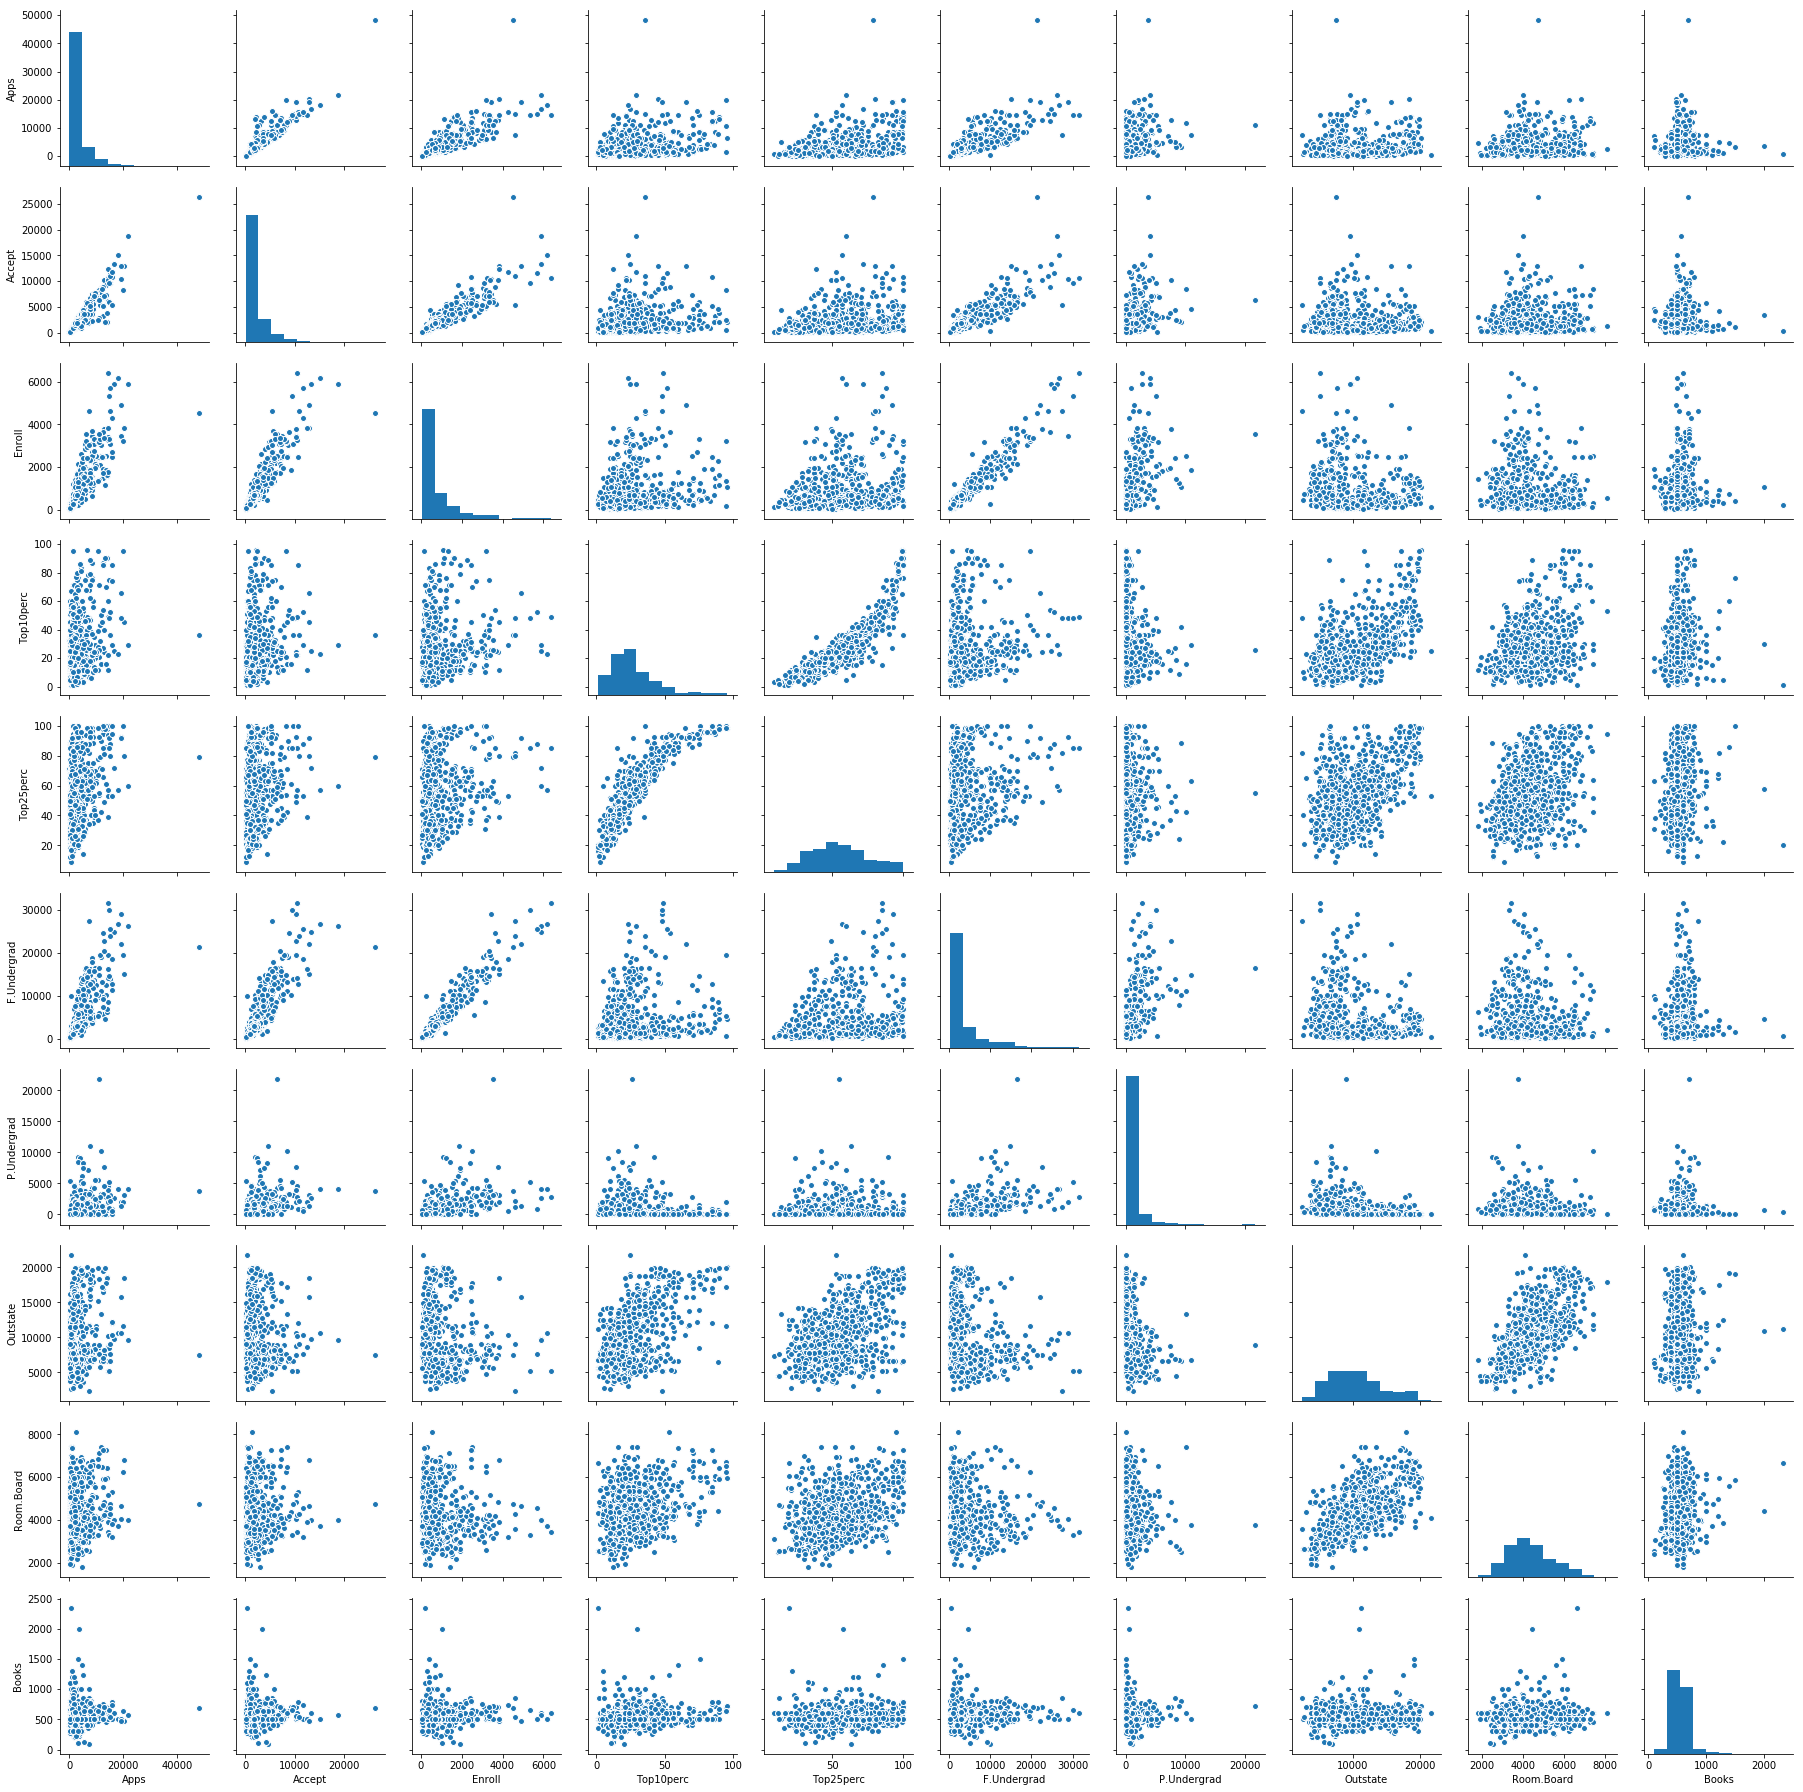

In [91]:
sns.pairplot(college.iloc[:,2:12])

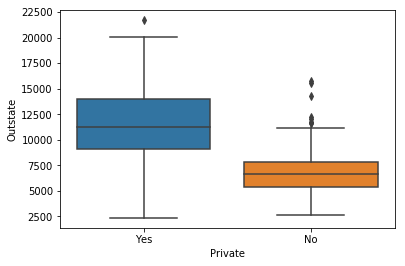

In [92]:
# side by side boxplot of outstate vs private
sns.boxplot(college['Private'], college['Outstate'])

In [95]:
# Create a new variable by binning top10perc. if top10perc is greater than 50%, then it's an elite high school. So 
# the variable elite will be set to Yes

college['elite'] = college['Top10perc'].apply(lambda x: "Yes" if (x>50) else "No")
college['elite'].describe()

count     777
unique      2
top        No
freq      699
Name: elite, dtype: object

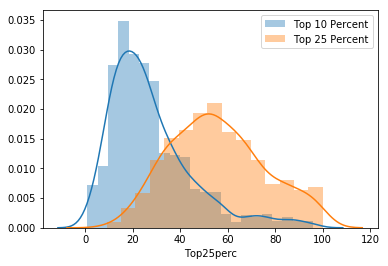

In [113]:
# create histograms for some of the variables
plt.figure("Histogram Plots")
sns.distplot(college['Top10perc'],label='Top 10 Percent')
sns.distplot(college['Top25perc'], label='Top 25 Percent')
plt.legend()
plt.show()

#### 9

In [20]:
# Remove observations 10 to 85 for Auto Dataset
Auto_sliced = Auto.iloc[1:85,]
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000,NaN


In [39]:
# Get relationship among predictors
# horsepower has ? in it which we need to get rid off
Auto['horsepower'] = Auto['horsepower'].astype(str)
Auto = Auto[~Auto['horsepower'].isin(['?'])]

In [40]:
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


In [43]:
Auto['horsepower'] = Auto['horsepower'].astype(str)

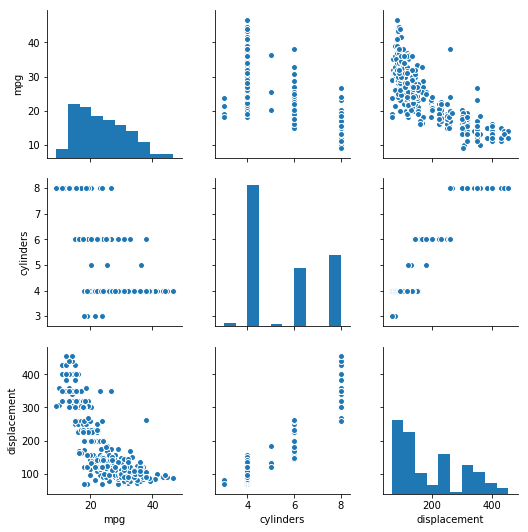

In [45]:
sns.pairplot(Auto.iloc[:,0:3])

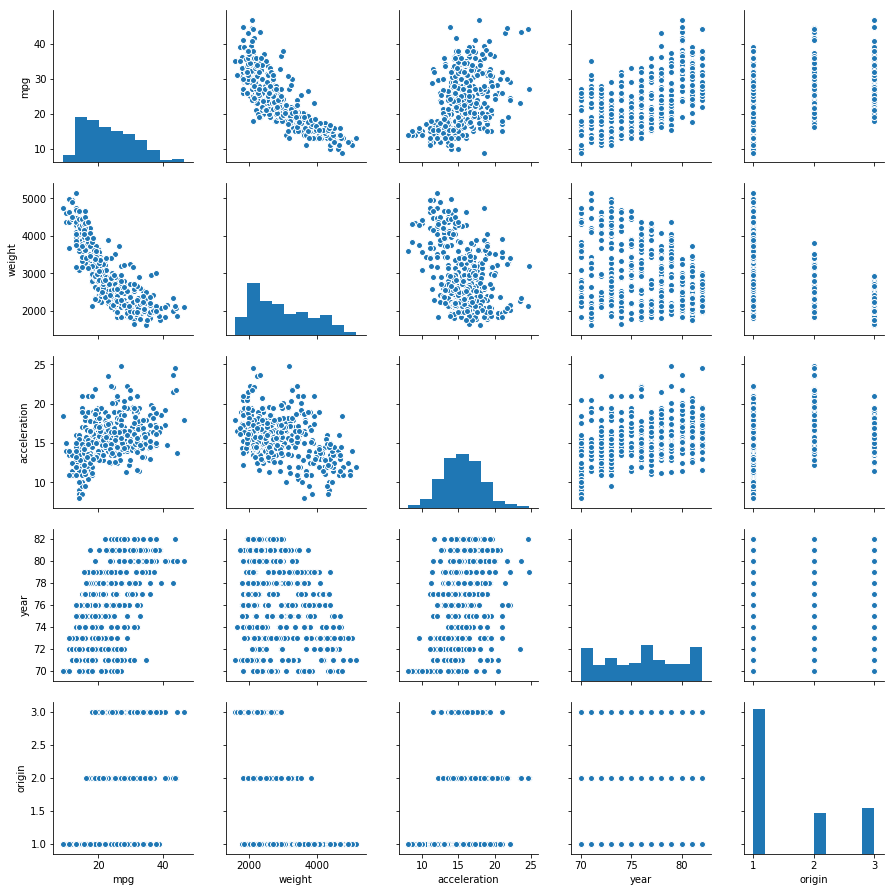

In [60]:
sns.pairplot(Auto.iloc[:,[0,4,5,6,7,8]])

#### There are lot's of observations w.r.t. mpg. Will leave that out here as it's rather straightforward

In [79]:
from sklearn.datasets import load_boston
boston = load_boston()

In [80]:
boston = pd.DataFrame(boston.data,columns=boston.feature_names)

In [90]:
boston.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


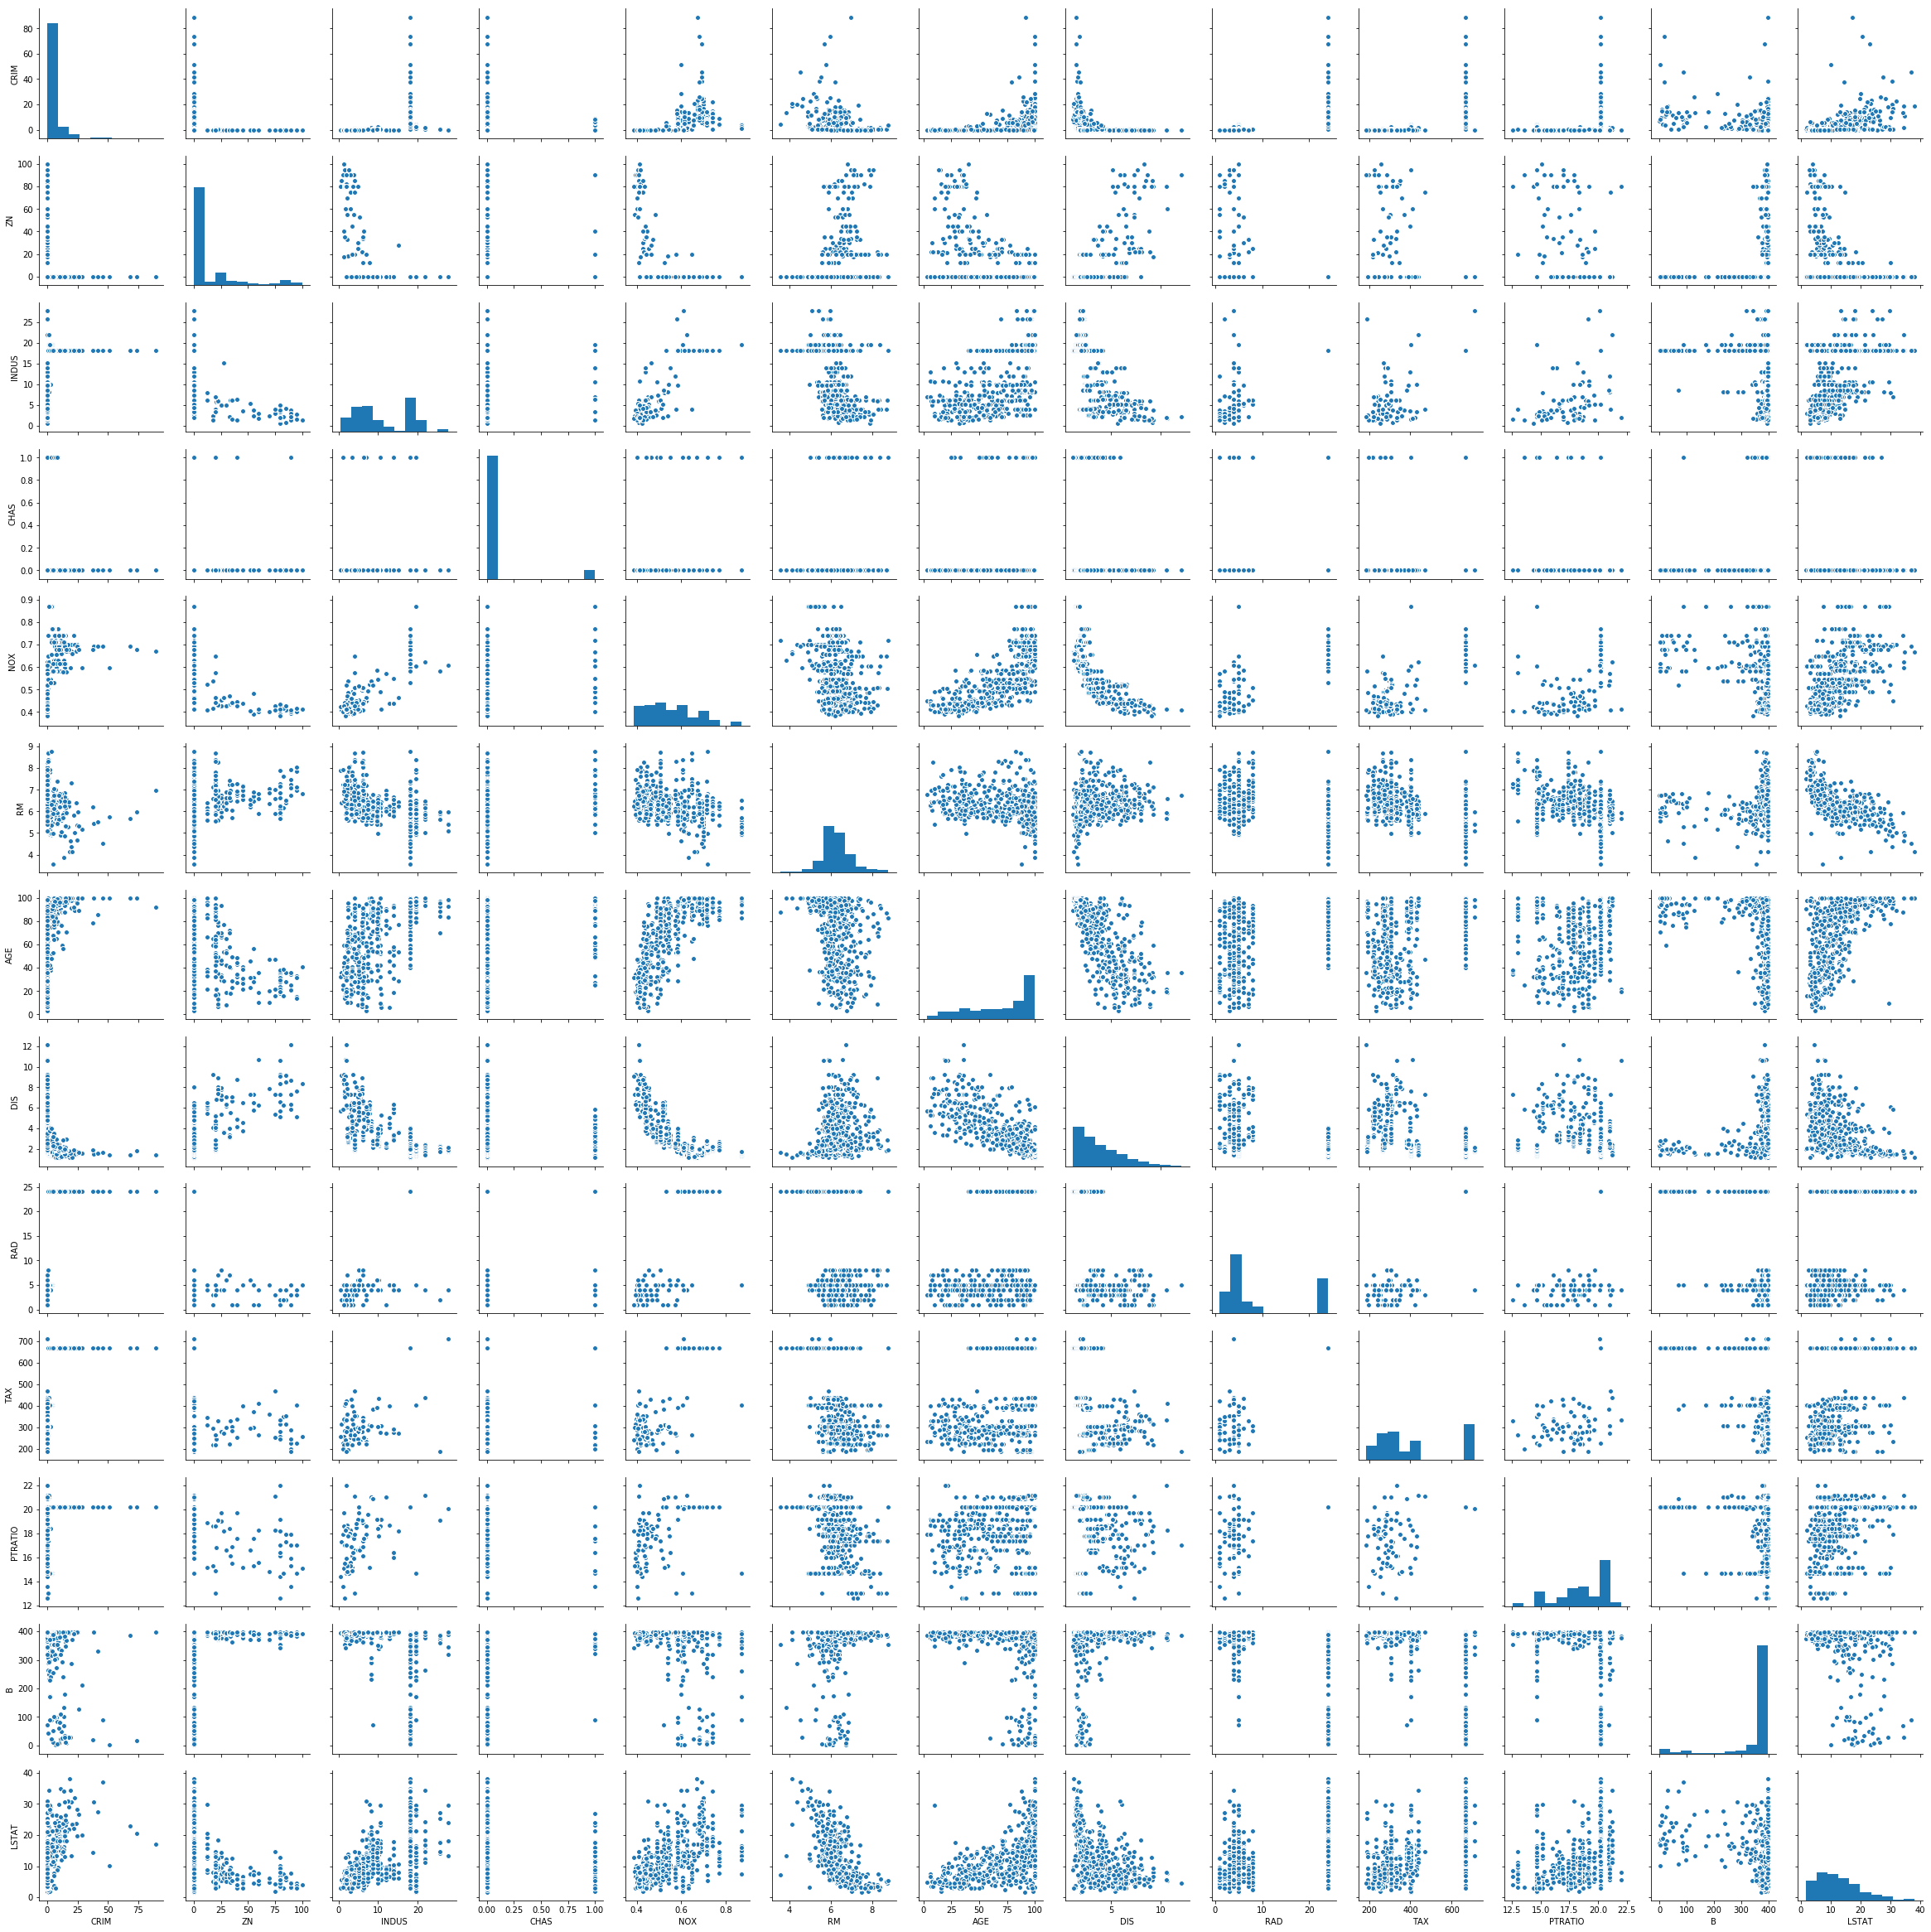

In [75]:
sns.pairplot(boston)

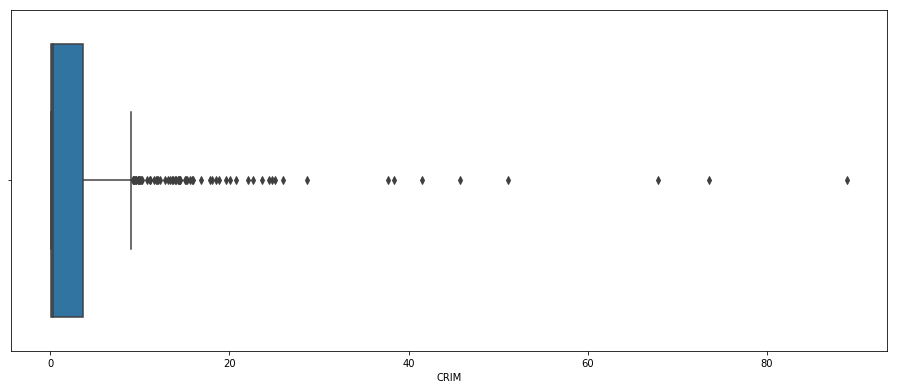

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 6.27)
sns.boxplot(boston['CRIM'])

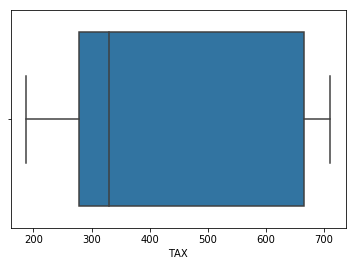

In [103]:
sns.boxplot(boston['TAX'])

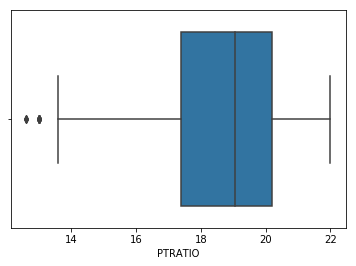

In [93]:
sns.distplot(boston['PTRATIO'])

In [104]:
# Median is 19
boston['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [106]:
# Number of suburbs around chas
sum(boston['CHAS'])

35.0

In [107]:
# Number of suburbs with avg more than 7 rooms per dwelling
len(boston[(boston['RM']>7)])

64

In [108]:
# Number of suburbs with avg more than 8 rooms per dwelling
len(boston[(boston['RM']>8)])

13

In [109]:
boston[(boston['RM']>8)].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000


In [111]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


For suburbs which average 8 or more rooms per dwelling <br>
a) Crime rates are lower<br>
b) Higher percentage of residents above the 'Lower status' of population<br>
c) Lower tax rates per 10000 USD<br>